# Heart disease Predictive modeling using various classification clustering and regression techniques.

## The dataset contains following attributes as detailed below:
    
1. age
2. sex
3. cp = chest pain type (4 values)
4. trestbps = resting blood pressure
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl
7. rstecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 for no presence of heart disease, 1 for presence of heart disease


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# To remove unwanted warnings in GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
hdp=pd.read_csv("c:/Users/bibek/Desktop/heart_disease_prediction.csv")

# Let us first explore the data for our analysis purpose

In [3]:
hdp.shape

(16608, 14)

In [4]:
hdp.isnull().values.any()

False

In [5]:
hdp.head(20)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
1    53    1   0       140   203    1        0      155      1      3.1   
2    70    1   0       145   174    0        1      125      1      2.6   
3    61    1   0       148   203    0        1      161      0      0.0   
4    62    0   0       138   294    1        1      106      0      1.9   
5    58    0   0       100   248    0        0      122      0      1.0   
6    58    1   0       114   318    0        2      140      0      4.4   
7    55    1   0       160   289    0        0      145      1      0.8   
8    46    1   0       120   249    0        0      144      0      0.8   
9    54    1   0       122   286    0        0      116      1      3.2   
10   71    0   0       112   149    0        1      125      0      1.6   
11   43    0   0       132   341    1        0      136      1      3.0   
12   34    0   1       118   210    0        1      192      0      0.7   
13   51    1   0       140   298    0        1      122      1      4.2   
14   52    1   0       128   204    1        1      156      1      1.0   
15   34    0   1       118   210    0        1      192      0      0.7   
16   51    0   2       140   308    0        0      142      0      1.5   
17   54    1   0       124   266    0        0      109      1      2.2   
18   50    0   1       120   244    0        1      162      0      1.1   
19   58    1   2       140   211    1        0      165      0      0.0   

    slope  ca  thal  target  
0       2   2     3       0  
1       0   0     3       0  
2       0   0     3       0  
3       2   1     3       0  
4       1   3     2       0  
5       1   0     2       1  
6       0   3     1       0  
7       1   1     3       0  
8       2   0     3       0  
9       1   2     2       0  
10      1   0     2       1  
11      1   0     3       0  
12      2   0     2       1  
13      1   3     3       0  
14      1   0     0       0  
15      2   0     2       1  
16      2   1     2       1  
17      1   1     3       0  
18      2   0     2       1  
19      2   0     2       1

In [6]:
hdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16608 entries, 0 to 16607
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       16608 non-null  int64  
 1   sex       16608 non-null  int64  
 2   cp        16608 non-null  int64  
 3   trestbps  16608 non-null  int64  
 4   chol      16608 non-null  int64  
 5   fbs       16608 non-null  int64  
 6   restecg   16608 non-null  int64  
 7   thalach   16608 non-null  int64  
 8   exang     16608 non-null  int64  
 9   oldpeak   16608 non-null  float64
 10  slope     16608 non-null  int64  
 11  ca        16608 non-null  int64  
 12  thal      16608 non-null  int64  
 13  target    16608 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.8 MB


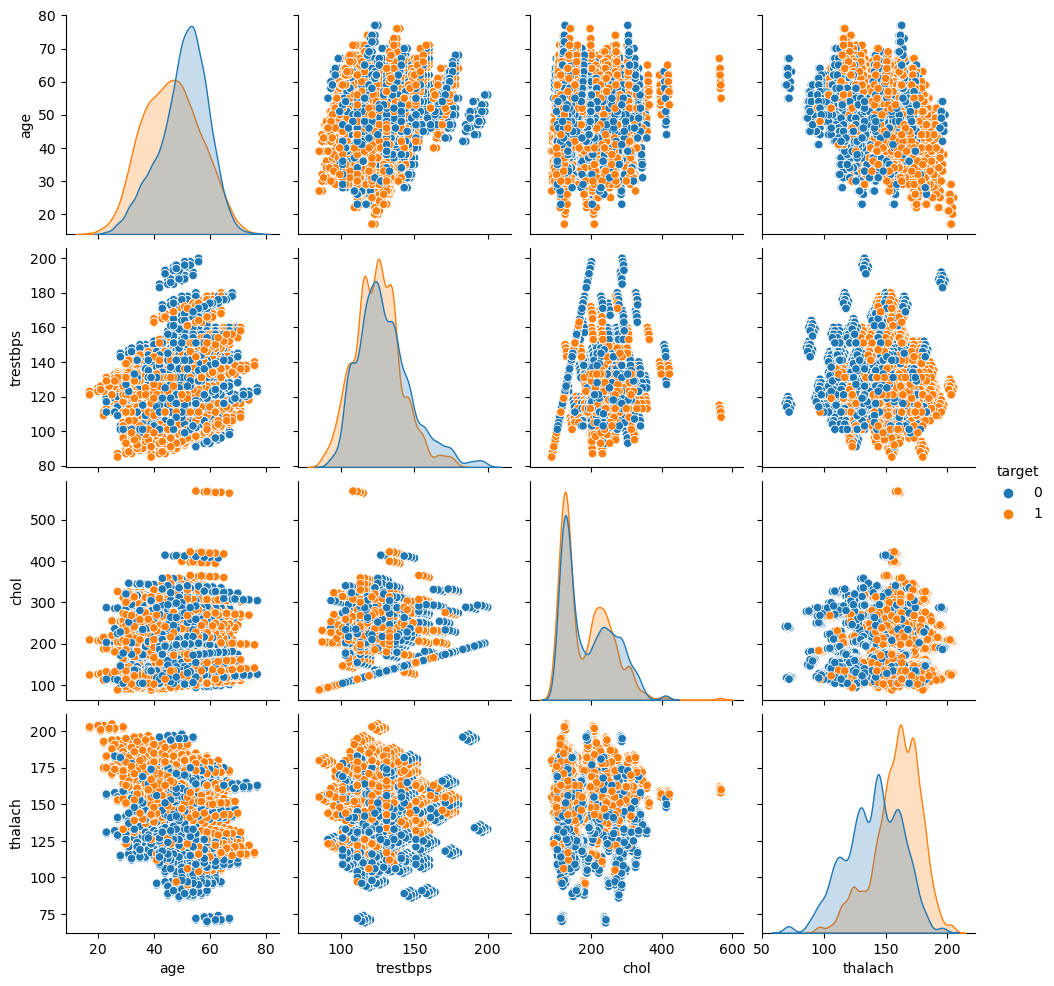

In [7]:
sns.pairplot(data=hdp,vars=['age','trestbps', 'chol','thalach'],hue='target')

In [8]:
hdp.describe().transpose()

count        mean        std   min    25%    50%    75%    max
age       16608.0   48.397881   9.725500  17.0   41.0   49.0   55.0   77.0
sex       16608.0    0.696532   0.459769   0.0    0.0    1.0    1.0    1.0
cp        16608.0    0.940270   1.028666   0.0    0.0    1.0    2.0    3.0
trestbps  16608.0  127.075145  17.615037  85.0  115.0  125.0  136.0  200.0
chol      16608.0  188.753854  71.007939  88.0  127.0  169.0  242.0  569.0
fbs       16608.0    0.149326   0.356420   0.0    0.0    0.0    0.0    1.0
restecg   16608.0    0.530829   0.529051   0.0    0.0    1.0    1.0    2.0
thalach   16608.0  149.698459  22.975748  69.0  133.0  153.0  167.0  205.0
exang     16608.0    0.335260   0.472096   0.0    0.0    0.0    1.0    1.0
oldpeak   16608.0    1.067919   1.171460   0.0    0.0    0.8    1.8    6.2
slope     16608.0    1.388247   0.618096   0.0    1.0    1.0    2.0    2.0
ca        16608.0    0.752408   1.029168   0.0    0.0    0.0    1.0    4.0
thal      16608.0    2.324663   0.620470   0.0    2.0    2.0    3.0    3.0
target    16608.0    0.513487   0.499833   0.0    0.0    1.0    1.0    1.0

<Axes: xlabel='target', ylabel='count'>

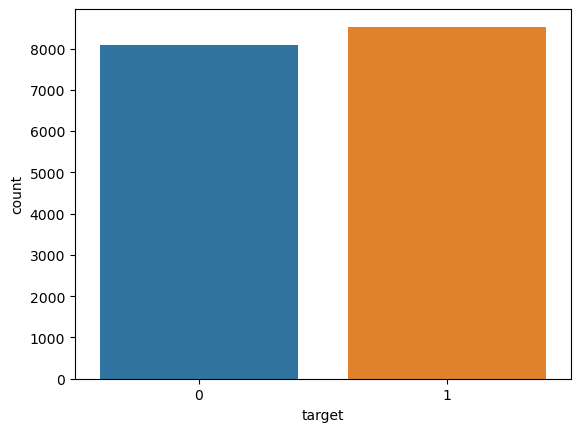

In [9]:
sns.countplot(data=hdp,x='target')

<Axes: >

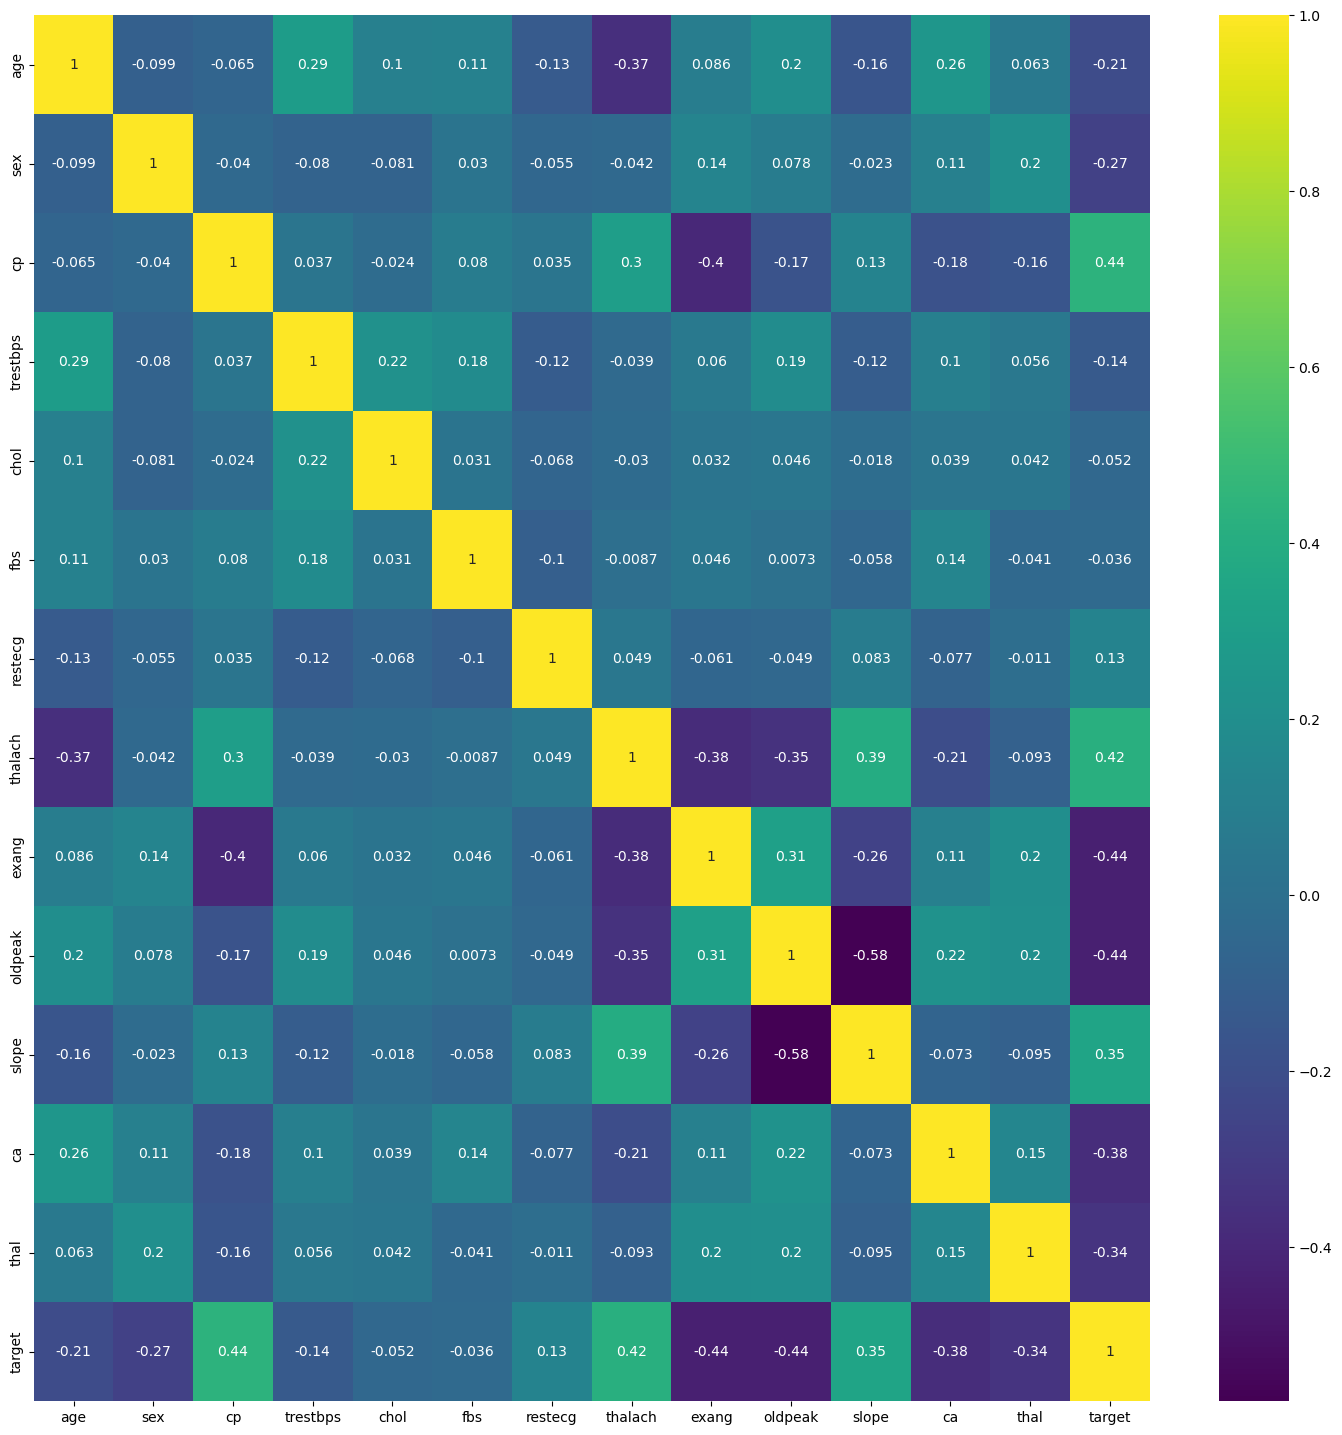

In [10]:
fig = plt.figure(figsize=(18,18),dpi=100)
sns.heatmap(data=hdp.corr(), annot=True, cmap='viridis', vmin=None, vmax=None, center=None,cbar=True, cbar_kws=None,
            cbar_ax=None, square=False, robust=False, fmt='.2g', annot_kws=None, linewidths=0,yticklabels='auto',
            mask=None, ax=None, linecolor='white', xticklabels='auto',)

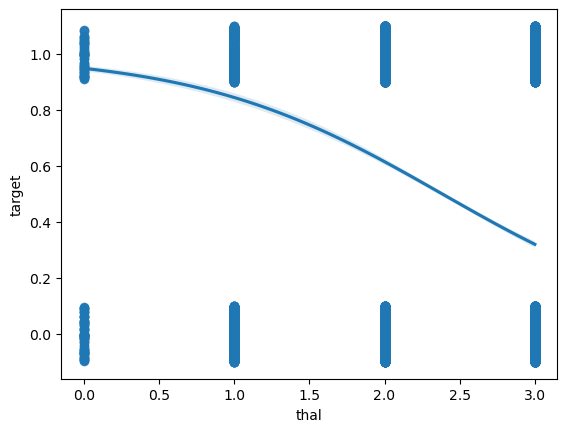

In [11]:
sns.regplot(x="thal", y="target", data=hdp,
           logistic=True, y_jitter=0.1);

<Axes: xlabel='target', ylabel='chol'>

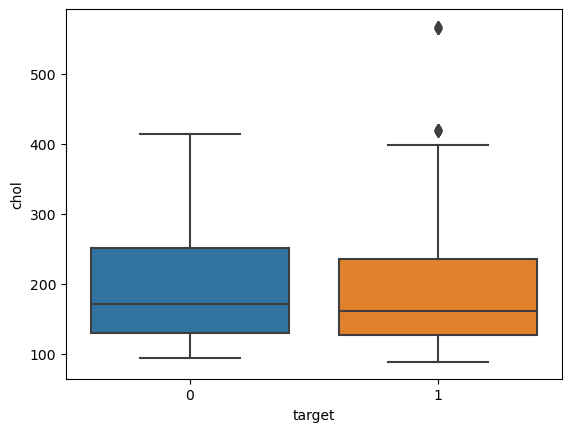

In [12]:
sns.boxplot(data=hdp, x="target", y="chol")

<Axes: xlabel='slope', ylabel='thal'>

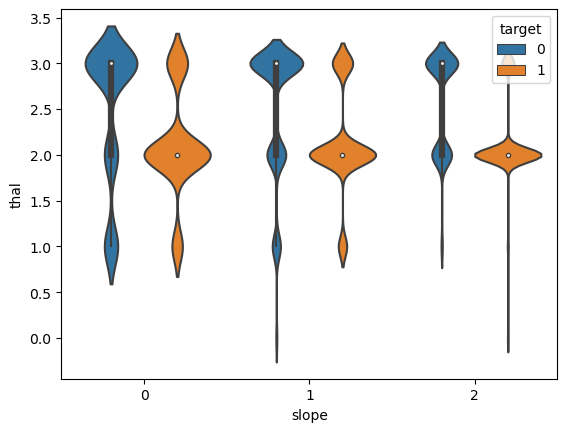

In [13]:
sns.violinplot(x='slope',y='thal', data=hdp, hue="target")

<Axes: xlabel='target', ylabel='thal'>

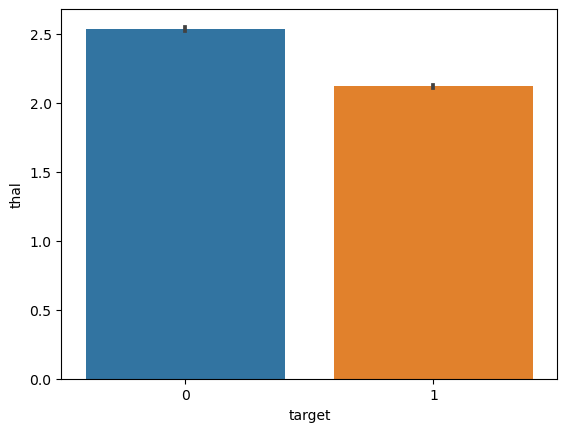

In [14]:
sns.barplot(data=hdp, x="target", y="thal")

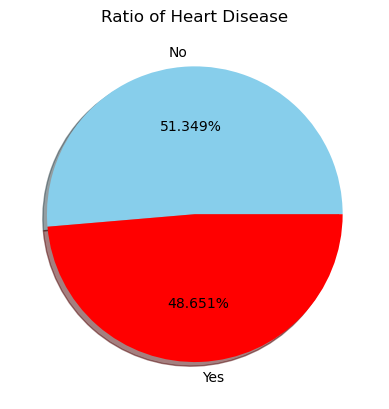

In [15]:
plt.pie(x = hdp['target'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'red'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

<Axes: xlabel='age', ylabel='count'>

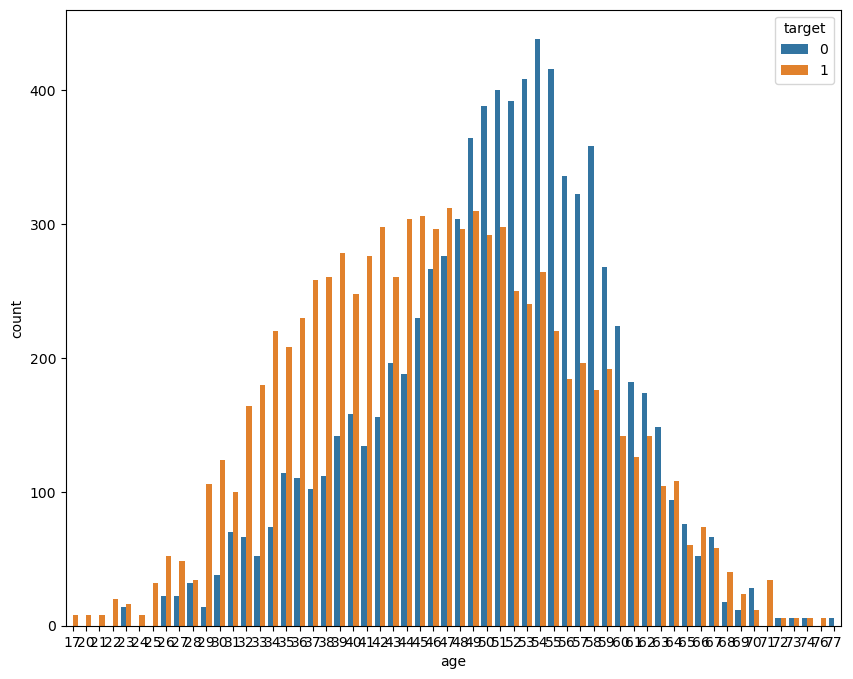

In [16]:
plt.figure(figsize= ( 10, 8))
sns.countplot(data=hdp, x="age", hue="target")

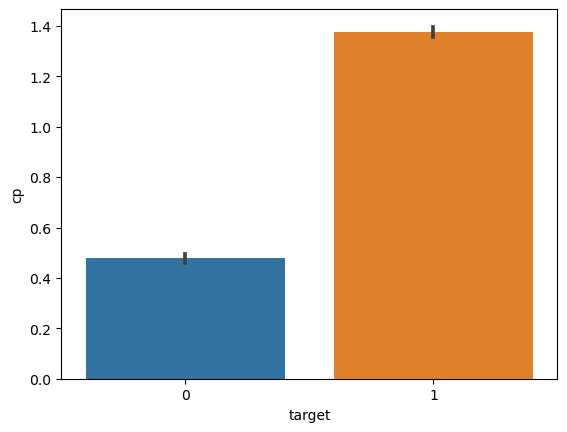

In [17]:
sns.barplot(data =hdp, y='cp', x='target');

<Axes: xlabel='sex', ylabel='count'>

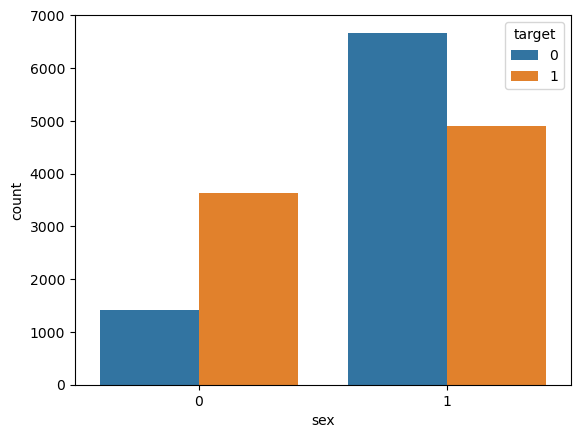

In [18]:
sns.countplot(data= hdp, x="sex", hue="target")

In [19]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

## Features extraction for logistic regression

In [20]:
X = hdp.drop(columns ='target', axis =1)
Y = hdp['target']

In [21]:
X.shape

(16608, 13)

In [22]:
Y.shape

(16608,)

## Modeling and evaluation

In [23]:
Logistregres = LogisticRegression()
stscaler = StandardScaler()

In [24]:
X = hdp.drop(labels='target', axis=1).values
Y = hdp['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=12, test_size=0.2)

In [25]:
pipeline = make_pipeline(stscaler, Logistregres)

pipeline.fit(X_train, Y_train)

Y_pred = pipeline.predict(X_test)

Y_pred_pb = pipeline.predict_proba(X_test)[:, 1] # slice second class positive

testing_accuracy = pipeline.score(X_test, Y_test)
training_accuracy = pipeline.score(X_train, Y_train)

print(classification_report(Y_test, Y_pred))
print('\n')
print(f'Training accuracy: {training_accuracy}')
print(f'Testing accuracy: {testing_accuracy}')

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1668
           1       0.82      0.89      0.86      1654

    accuracy                           0.85      3322
   macro avg       0.85      0.85      0.85      3322
weighted avg       0.85      0.85      0.85      3322



Training accuracy: 0.8584976667168448
Testing accuracy: 0.8506923540036123


In [26]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_pb)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500, template='plotly_dark'
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## Testing model accuracy after train and test split


In [27]:
train_pred = Logistregres.predict(X_train)
train_acc= accuracy_score(train_pred, Y_train)
train_acc

0.6558031010085804

In [28]:
test_pred = Logistregres.predict(X_test)
test_acc=accuracy_score(test_pred,Y_test)
test_acc

0.6520168573148706

In [29]:
print(f'AUC score: {roc_auc_score(Y_pred, Y_pred_pb)}')

AUC score: 1.0


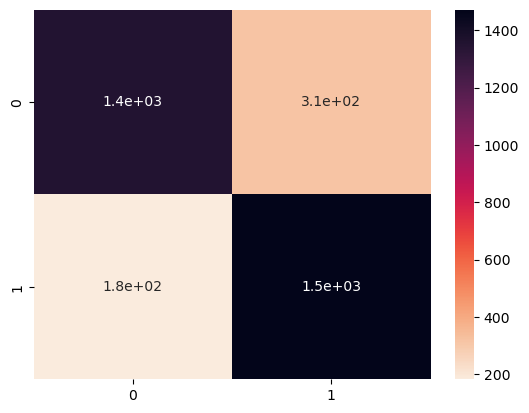

In [30]:
cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True, cmap='rocket_r',vmin=None, vmax=None, center=None,cbar=True, cbar_kws=None,
            cbar_ax=None, square=False, robust=False, fmt='.2g', annot_kws=None, linewidths=0,yticklabels='auto',
            mask=None, ax=None, linecolor='white', xticklabels='auto')
plt.show()

# Clustering positive and negative cases using K means clustering

## By using the elbow method below, it was found the optimal number of clusters with the inertia lowering gradually to be 3. In this case however, two clusters for binary classification will be used as we will be clustering only positive and negative cases.

In [31]:
pca = PCA(n_components=5)
nhdp = hdp.drop(labels='target', axis=1)
pca_hdp = pca.fit_transform(nhdp)
kmeans = range(1, 6)
inertias = []

for k in kmeans:
    model = KMeans(n_clusters=k)
    
    model.fit(pca_hdp)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

fig = px.line(x=kmeans, y=inertias, markers=True, title='Optimal number of clusters', template='plotly_dark')
fig.update_layout(title='Number of clusters vs Inertia')
fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="Inertia")
fig.show()

In [32]:
model = KMeans(n_clusters=2)

cluster_labels = model.fit_predict(pca_hdp)

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

label_dict = {0: 'Negative cases', 1: 'Positive cases'}

fig = px.scatter(pca_hdp, x=pca_hdp[:, 0], y=pca_hdp[:, 1], color=cluster_labels, template='plotly_dark')
fig.update_layout(title='Clusters of positive and negative diagnosis')
fig.update_layout(xaxis_visible=False, yaxis_visible=False, 
                  xaxis=dict(showgrid=False, zeroline=False), 
                  yaxis=dict(showgrid=False, zeroline=False))
fig.add_trace(go.Scatter(x=centroids_x, y=centroids_y, mode='markers', 
                         marker=dict(color='red', size=6)))
fig.show()

# Backpropagation neural network

In [33]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        sizes = [input_size] + hidden_sizes + [output_size]
        self.weights = [np.random.randn(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feed_forward(self, X):
        self.layers = [X]
        for i in range(len(self.weights)):
            layer = self.sigmoid(np.dot(self.layers[-1], self.weights[i]))
            self.layers.append(layer)
        return self.layers[-1]

    def back_propagation(self, X, y, learning_rate):
        output_error = y - self.layers[-1]
        output_delta = output_error * self.sigmoid_derivative(self.layers[-1])

        deltas = [output_delta]
        for i in range(len(self.weights)-1, 0, -1):
            hidden_error = np.dot(deltas[-1], self.weights[i].T)
            hidden_delta = hidden_error * self.sigmoid_derivative(self.layers[i])
            deltas.append(hidden_delta)
        deltas.reverse()

        for i in range(len(self.weights)):
            self.weights[i] += learning_rate * np.dot(self.layers[i].T, deltas[i])

    def train(self, X, y, learning_rate, epochs):
        for i in range(epochs):
            self.feed_forward(X)
            self.back_propagation(X, y, learning_rate)

    def predict(self, X):
        return np.round(self.feed_forward(X)).astype(int)

In [34]:
X_arr = np.array(X)
y_arr = np.array(Y).reshape(-1, 1)

Creating a neural network with 3 input nodes, 6 nodes in the first hidden layer, 3 nodes in the second hidden layer, and 1 output node

In [35]:
nn = NeuralNetwork(13, [6,3], 1)

Train the neural network for 20 epochs

In [36]:
nn.train(X_arr, y_arr, 0.1, 30)

Make predictions on the input data

In [37]:
predictions = nn.predict(X)
y_pred = pd.DataFrame(predictions)
y_pred = y_pred[0]

In [38]:
y_pred

0        1
1        1
2        1
3        1
4        1
        ..
16603    1
16604    1
16605    1
16606    1
16607    1
Name: 0, Length: 16608, dtype: int32

In [39]:
print(accuracy_score(y_arr, y_pred))

0.5134874759152216


# Artificial Neural Network

In [40]:
X_train,X_test,Y_train , Y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
hyper_parameters = {'batch_size':['auto',100], 'max_iter':[200,500],'hidden_layer_sizes':[5,(5,5,5)],
                    'learning_rate_init': [0.05,0.01,0.001,0.005]}


gs  =GridSearchCV(MLPClassifier(),hyper_parameters,scoring='roc_auc',n_jobs=-1
                  ,return_train_score=False,verbose=0,cv=5)
clf =gs.fit(X_train, Y_train)
print('The best combination is:')
print(clf.best_params_)

print('The best Accuracy is:')
print(clf.best_score_)

The best combination is:
{'batch_size': 100, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.001, 'max_iter': 200}
The best Accuracy is:
0.99906998346322


# Support vector machine classifier

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train,Y_train)

SVC()

In [46]:
Pred = svm.predict(X_test)

In [47]:
accuracy_score(Y_test,Pred)

0.9897652016857315

# Gradient Boosting Classifier


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
grad = GradientBoostingClassifier()

In [50]:
grad.fit(X_train,Y_train)

GradientBoostingClassifier()

In [51]:
gradpred = grad.predict(X_test)

In [52]:
accuracy_score(Y_test,gradpred)

0.9674894641782059

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier()

In [55]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
dtcpred= dtc.predict(X_test)

In [57]:
accuracy_score(Y_test,dtcpred)

0.99789283564118

# Random Forest Classifier


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier()

In [60]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
rfcpred= rfc.predict(X_test)

In [62]:
accuracy_score(Y_test,rfcpred)

1.0

# K Nearest Neighbors

In [68]:
k=4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train , Y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [69]:
y_hat = knn.predict(X_test)
y_hat[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [70]:
print ('Train set accuracy: ', metrics.accuracy_score(Y_train , knn.predict(X_train)))
print ('Test set accuracy: ', metrics.accuracy_score(Y_test , knn.predict(X_test))) 

Train set accuracy:  1.0
Test set accuracy:  1.0


In [71]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

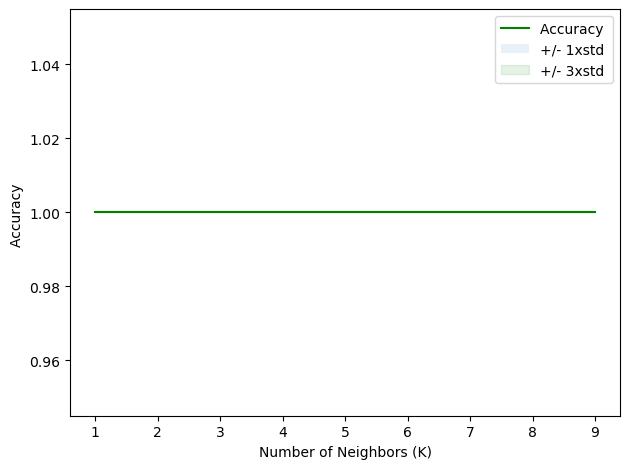

In [72]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()